In [33]:
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
import numpy as np
import pandas
import os
import sys
tf_models_dir = "/home/matech/projects/tf_models"
sys.path.append(os.path.join(tf_models_dir, "research/object_detection/"))
sys.path.append(os.path.join(tf_models_dir, "research/"))
from utils import label_map_util

data_dir = "GTSRB/"

In [2]:
labels_list = []
for label_dir in os.listdir(data_dir):
    label_dir_path = os.path.join(data_dir, label_dir)
    labels_list.append(pandas.read_csv(os.path.join(label_dir_path, "GT-" + label_dir + ".csv"), sep=";"))
n_classes = len(labels_list)
print("Number of classes: ", n_classes)

labels = None
for df in labels_list:
    if labels is None:
        labels = df
    else:
        labels = labels.append(df)
n_examples = len(labels)
print("Number of examples: ", n_examples)
print("Data: ", labels.columns.values)

Number of classes:  43
Number of examples:  39209
Data:  ['Filename' 'Width' 'Height' 'Roi.X1' 'Roi.Y1' 'Roi.X2' 'Roi.Y2' 'ClassId']


In [3]:
height = []
width = []
for row in labels.iterrows():
    row = row[1]
    height.append(row["Height"])
    width.append(row["Width"])

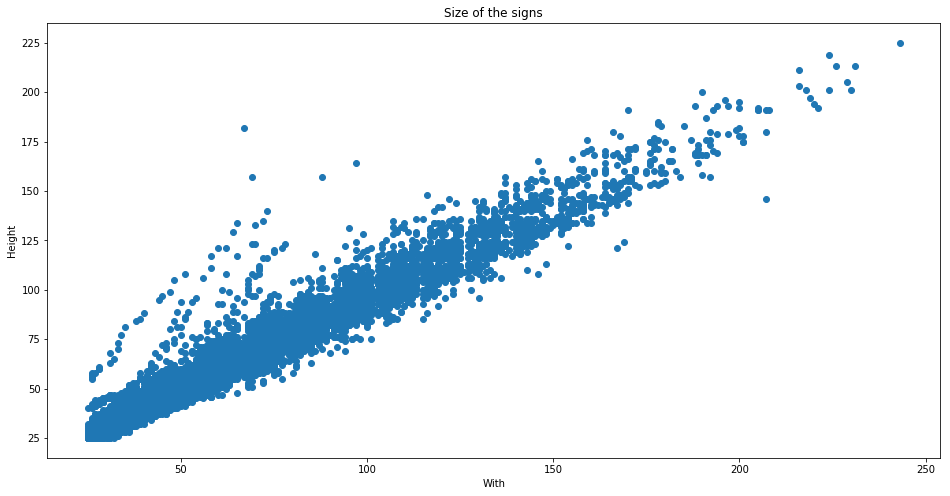

In [34]:
fig, ax = plt.subplots()
ax.plot(width, height, 'o')
ax.set_xlabel("With")
ax.set_ylabel("Height")
ax.set_title("Size of the signs")
plt.show()

In [5]:
examples_per_class = labels[["ClassId", "Filename"]].groupby(["ClassId"]).count()
examples_per_class_list = examples_per_class["Filename"].tolist()

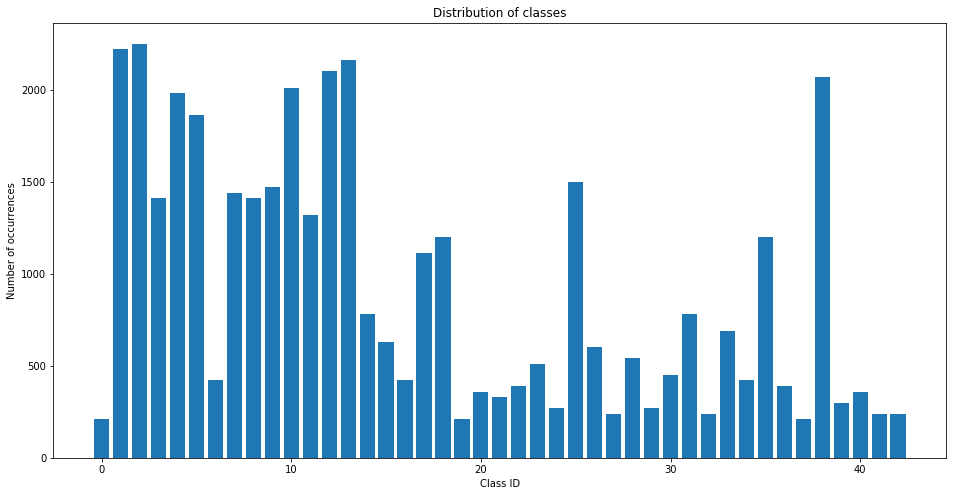

In [35]:
plt.bar(range(len(examples_per_class_list)), examples_per_class_list)
plt.xlabel("Class ID")
plt.ylabel("Number of occurrences")
plt.title("Distribution of classes")
plt.show()

In [7]:
for l, v in zip(("Min: ", "Max: ", "Avg: ", "Sum: "), (np.min, np.max, np.mean, np.sum)):
    print(l + str(v(examples_per_class_list)))

Min: 210
Max: 2250
Avg: 911.837209302
Sum: 39209


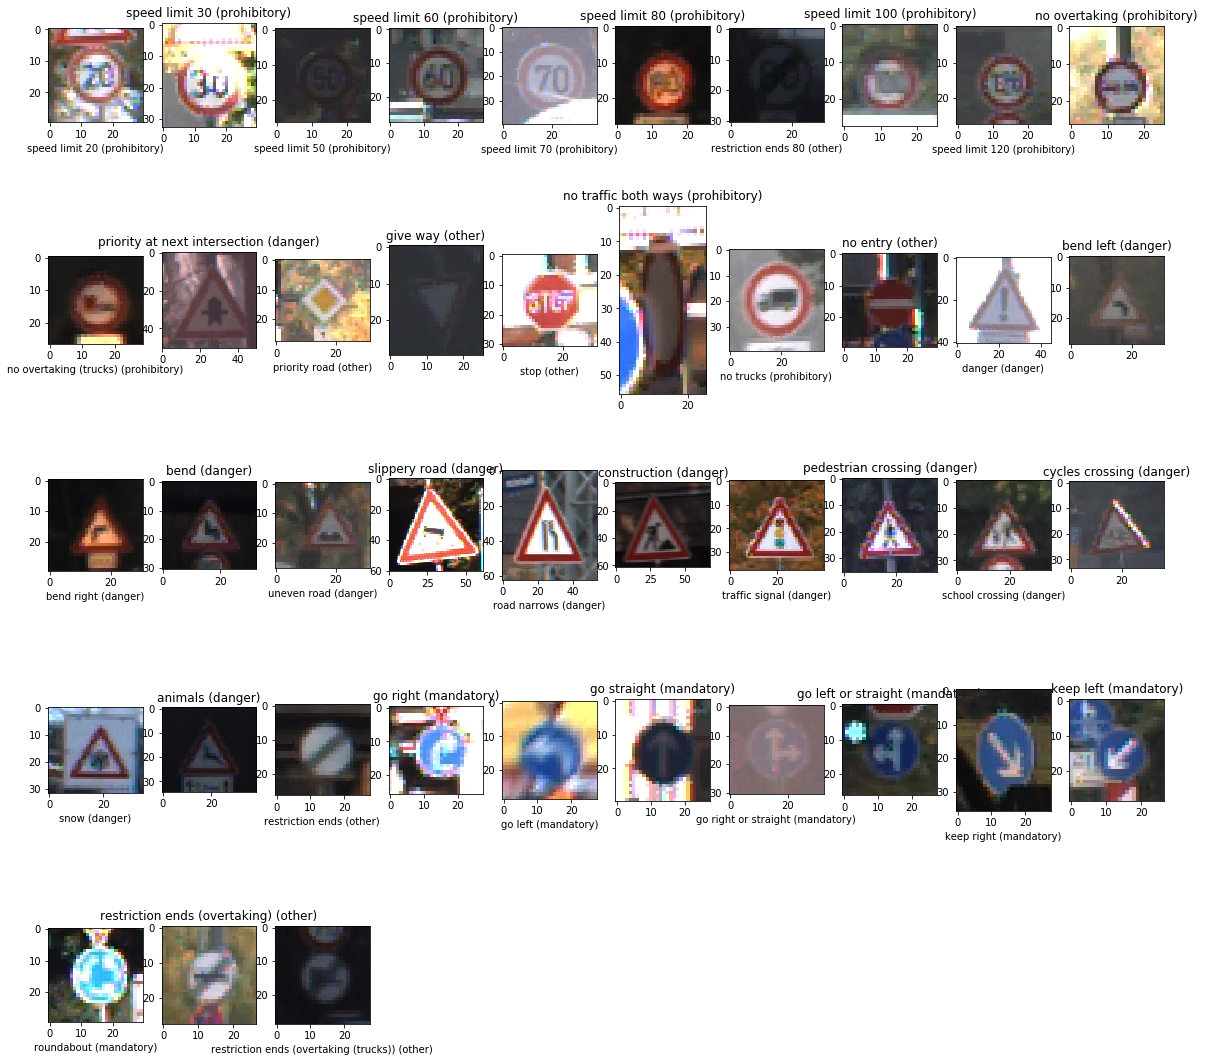

In [8]:
label_map = label_map_util.load_labelmap("label_map.pbtxt")
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=n_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
for i in range(n_classes):
    plt.subplot(5, 10, i+1)
    if i % 2 == 0:
        plt.xlabel(categories[i]["name"])
    else:
        plt.title(categories[i]["name"])
    plt.imshow(imread(os.path.join(data_dir, str(i).zfill(5), "00001_00001.ppm")))
plt.show()

In [36]:
labels["Darkness"] = -1
for i in range(n_classes):
    class_dir = os.path.join(data_dir, str(i).zfill(5))
    for file_name in labels[labels["ClassId"] == i]["Filename"]:
        labels.loc[(labels["Filename"] == file_name) & (labels["ClassId"] == i), "Darkness"] = np.mean(
                                                                                    imread(os.path.join(class_dir, file_name)))
    print(i)
print(labels[labels["Darkness"] == -1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
Empty DataFrame
Columns: [Filename, Width, Height, Roi.X1, Roi.Y1, Roi.X2, Roi.Y2, ClassId, Darkness]
Index: []


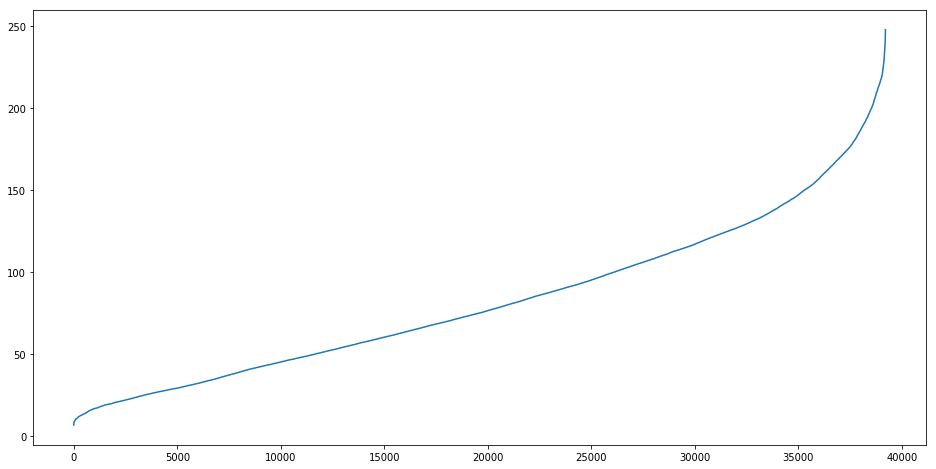

In [37]:
plt.plot(np.sort(labels["Darkness"].tolist()))
plt.show()

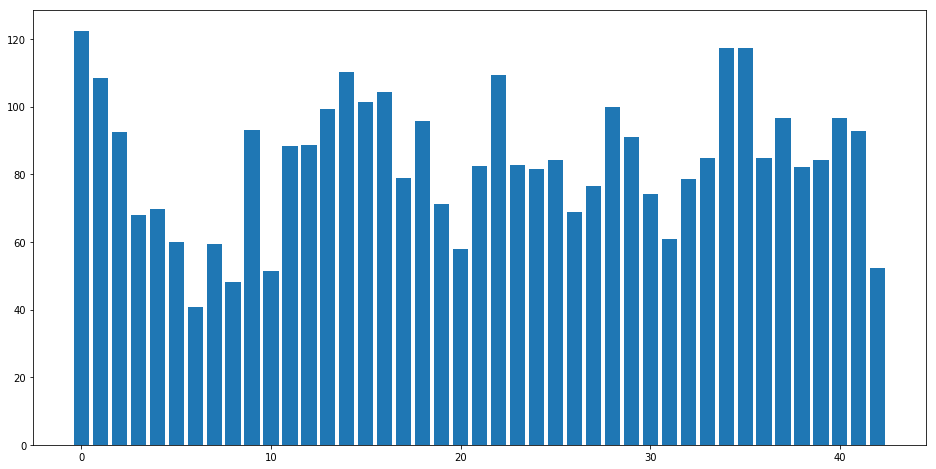

In [38]:
plt.bar(range(n_classes), labels.groupby(["ClassId"]).mean()["Darkness"].tolist())
plt.show()